<a href="https://colab.research.google.com/github/HRS5020/Tensorflow/blob/main/Fashion_mnist_NN_coursera_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Tensorflow verion = ", tf.__version__)

Tensorflow verion =  2.8.0


In [44]:
# load the dataset

fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()


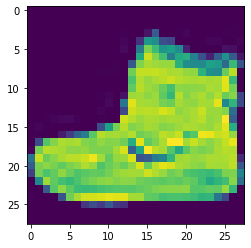

In [45]:
# sample training data visualisation

index =0

np.set_printoptions(linewidth=320)
# check the raw data
# print(f'LABEL: {training_labels[index]}')
# print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [46]:
# Normalize the pixel values of the train and test images

training_images  = training_images / 255.0
test_images = test_images / 255.0

In [47]:
print(training_labels)

[9 0 0 ... 3 0 5]


In [48]:
# Build the classification model

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5, batch_size=128)



Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.5517 - accuracy: 0.8102
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4019 - accuracy: 0.8593
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3649 - accuracy: 0.8709
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3378 - accuracy: 0.8787
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3194 - accuracy: 0.8851


In [49]:
# Check how the model performs on unseen data 

result = model.evaluate(test_images, test_labels)
print('Evaluation resuls:\nLoss = {} \nAccuracy = {}'.format(result[0],result[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3923 - accuracy: 0.8593
Evaluation resuls:
Loss = 0.39234188199043274 
Accuracy = 0.8593000173568726


for a 128 hidden neurons in a hidden layer with relu activation fn,
we could achieve the accuracy of 0.88 with training data and 0.86 with test data in 5 epochs.

Now, we will experiment with these parameters and see the differences in result.

In [50]:
# below returns the predicted value of each class by the trained model for each test images
classifications = model.predict(test_images)

# Example output probability for first test image
print(classifications[0])
print(np.argmax(classifications[0]))

[6.71183534e-06 3.55426799e-08 1.63222612e-05 1.62700435e-05 8.64675076e-06 4.02448475e-02 8.55987528e-05 1.15836106e-01 1.37894019e-03 8.42406571e-01]
9


**Imapct of number neurons in hidden layer **

In [51]:
# classification model function 

def classification_model(hidden_neurons,hidden_activation_fn):
    model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(hidden_neurons, activation=hidden_activation_fn), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
    return model

In [52]:
# 512 hidden layer neurons
model1 = classification_model(512, tf.nn.relu)
model1.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model1.fit(training_images, training_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.5006 - accuracy: 0.8255
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3749 - accuracy: 0.8667
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3321 - accuracy: 0.8793
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3061 - accuracy: 0.8883
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2857 - accuracy: 0.8957


In [53]:
# 1024 hidden layer neurons
model2 = classification_model(1024, tf.nn.relu)
model2.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model2.fit(training_images, training_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 16ms/step - loss: 0.4954 - accuracy: 0.8266
Epoch 2/5
469/469 [==============================] - 8s 16ms/step - loss: 0.3656 - accuracy: 0.8687
Epoch 3/5
469/469 [==============================] - 8s 16ms/step - loss: 0.3212 - accuracy: 0.8829
Epoch 4/5
469/469 [==============================] - 8s 16ms/step - loss: 0.2983 - accuracy: 0.8898
Epoch 5/5
469/469 [==============================] - 8s 16ms/step - loss: 0.2825 - accuracy: 0.8956


In [54]:
result = model1.evaluate(test_images, test_labels)
print('Evaluation resuls for model 1 :\nLoss = {} \nAccuracy = {}'.format(result[0],result[1]))

result = model2.evaluate(test_images, test_labels)
print('Evaluation resuls for model 2 :\nLoss = {} \nAccuracy = {}'.format(result[0],result[1]))

313/313 [==============================] - 1s 4ms/step - loss: 0.3794 - accuracy: 0.8646
Evaluation resuls for model 1 :
Loss = 0.37942779064178467 
Accuracy = 0.8646000027656555
313/313 [==============================] - 2s 5ms/step - loss: 0.3260 - accuracy: 0.8842
Evaluation resuls for model 2 :
Loss = 0.32601961493492126 
Accuracy = 0.8841999769210815


Accuracy does improve with increased neurons as well as time to train the model.
However, the increase in training accuracy is negligible.
Model 2 performs better for test data with 86.92% acc as compared model 1 with 82.38%

# Effect of number Epochs 

In [55]:
# Build the classification model

model3 = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])





# Run a loop cloning the model for diff epochs
for i in [5,10,15]:

    model_cloned = tf.keras.models.clone_model(model3)

    model_cloned.compile(optimizer = tf.optimizers.Adam(),
                         loss = 'sparse_categorical_crossentropy',
                         metrics=['accuracy'])

    model_cloned.fit(training_images, training_labels, epochs=i, batch_size=128)

    result = model_cloned.evaluate(test_images, test_labels)
    print('Evaluation resuls for {} epochs :\nLoss = {} \nAccuracy = {}'.format(i, result[0],result[1]))




Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.5636 - accuracy: 0.8054
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4039 - accuracy: 0.8569
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3649 - accuracy: 0.8694
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3362 - accuracy: 0.8794
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3828 - accuracy: 0.8643
Evaluation resuls for 5 epochs :
Loss = 0.3827519714832306 
Accuracy = 0.864300012588501
Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.5525 - accuracy: 0.8104
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4060 - accuracy: 0.8582
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3598 - accuracy: 0.8718
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3417 - accuracy: 0.8775
Epoch 5/10
469/4